In [101]:
from mnist import MNIST
import numpy as np
import torch
import torch.nn.functional as F
from matplotlib import pyplot as plt

In [102]:
def load_dataset():
    mndata = MNIST("./data/python-mnist/data/")
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0
    return X_train, labels_train, X_test, labels_test
X_train, labels_train, X_test, labels_test = load_dataset()
X_train = torch.from_numpy(X_train).float().cuda()
y_train = torch.from_numpy(labels_train).long().cuda()
X_test = torch.from_numpy(X_test).float().cuda()
y_test = torch.from_numpy(labels_test).long().cuda()

In [124]:
n, d = X_train.shape
m = X_test.shape[0]

In [125]:
def train(X_train, y_train, X_test, y_test, reg = None, step_size = 0.01, stop = 1e-4):
    class_rate_train_l = []
    class_rate_test_l = []
    epochs = 50
    W = torch.zeros(784, 10, device = 0 , requires_grad= True).float()
#     step_size = 0.01
    n = y_train.shape[0]
    k = 10 # number of classes
    y_train_onehot = torch.FloatTensor(n, k).zero_().cuda()
    y_train_onehot.scatter_(1, y_train.unsqueeze(-1).long(), 1)
    W_update = torch.tensor([1])
    with torch.cuda.device(0):
        while W_update > stop: # TODO: converge condition
            if reg == "ridge":
                y_hat = torch.matmul(X_train, W)
                criterion = torch.nn.MSELoss()
                loss = criterion(y_hat, y_train_onehot)
            elif reg == "logistics":
                y_hat = torch.matmul(X_train, W)
                loss = F.cross_entropy(y_hat, y_train)
            else:
                assert reg == None, "needs regression type"

            
            loss.backward()
            W.data = W.data - step_size * W.grad
            W_update = torch.norm(step_size * W.grad, p = 2)

            y_pred_train =  torch.argmax(torch.matmul(X_train, torch.matmul(W,  torch.eye(10).cuda())), axis = 1)
            y_pred_test = torch.argmax(torch.matmul(X_test, torch.matmul(W,  torch.eye(10).cuda())), axis = 1)
            class_rate_train = torch.sum(y_pred_train ==y_train).item()/n
            class_rate_test = torch.sum(y_pred_test == y_test).item()/m
            class_rate_train_l.append(class_rate_train)
            class_rate_test_l.append(class_rate_test)
    #         print("W.grad: ", W.grad)
            print("W_update: ", W_update)


            W.grad.zero_()
    return class_rate_train_l, class_rate_test_l


In [126]:
class_rate_train_l1, class_rate_test_l1 =\
    train(X_train, y_train, X_test, y_test, reg = "ridge")

torch.Size([60000, 10])
torch.Size([60000])
ridge
W_update:  tensor(0.0043, device='cuda:0')
ridge
W_update:  tensor(0.0040, device='cuda:0')
ridge
W_update:  tensor(0.0038, device='cuda:0')
ridge
W_update:  tensor(0.0036, device='cuda:0')
ridge
W_update:  tensor(0.0034, device='cuda:0')
ridge
W_update:  tensor(0.0032, device='cuda:0')
ridge
W_update:  tensor(0.0031, device='cuda:0')
ridge
W_update:  tensor(0.0029, device='cuda:0')
ridge
W_update:  tensor(0.0028, device='cuda:0')
ridge
W_update:  tensor(0.0027, device='cuda:0')
ridge
W_update:  tensor(0.0026, device='cuda:0')
ridge
W_update:  tensor(0.0025, device='cuda:0')
ridge
W_update:  tensor(0.0024, device='cuda:0')
ridge
W_update:  tensor(0.0023, device='cuda:0')
ridge
W_update:  tensor(0.0022, device='cuda:0')
ridge
W_update:  tensor(0.0022, device='cuda:0')
ridge
W_update:  tensor(0.0021, device='cuda:0')
ridge
W_update:  tensor(0.0021, device='cuda:0')
ridge
W_update:  tensor(0.0020, device='cuda:0')
ridge
W_update:  tensor(0

ridge
W_update:  tensor(0.0008, device='cuda:0')
ridge
W_update:  tensor(0.0008, device='cuda:0')
ridge
W_update:  tensor(0.0008, device='cuda:0')
ridge
W_update:  tensor(0.0008, device='cuda:0')
ridge
W_update:  tensor(0.0007, device='cuda:0')
ridge
W_update:  tensor(0.0007, device='cuda:0')
ridge
W_update:  tensor(0.0007, device='cuda:0')
ridge
W_update:  tensor(0.0007, device='cuda:0')
ridge
W_update:  tensor(0.0007, device='cuda:0')
ridge
W_update:  tensor(0.0007, device='cuda:0')
ridge
W_update:  tensor(0.0007, device='cuda:0')
ridge
W_update:  tensor(0.0007, device='cuda:0')
ridge
W_update:  tensor(0.0007, device='cuda:0')
ridge
W_update:  tensor(0.0007, device='cuda:0')
ridge
W_update:  tensor(0.0007, device='cuda:0')
ridge
W_update:  tensor(0.0007, device='cuda:0')
ridge
W_update:  tensor(0.0007, device='cuda:0')
ridge
W_update:  tensor(0.0007, device='cuda:0')
ridge
W_update:  tensor(0.0007, device='cuda:0')
ridge
W_update:  tensor(0.0007, device='cuda:0')
ridge
W_update:  ten

W_update:  tensor(0.0004, device='cuda:0')
ridge
W_update:  tensor(0.0004, device='cuda:0')
ridge
W_update:  tensor(0.0004, device='cuda:0')
ridge
W_update:  tensor(0.0004, device='cuda:0')
ridge
W_update:  tensor(0.0004, device='cuda:0')
ridge
W_update:  tensor(0.0004, device='cuda:0')
ridge
W_update:  tensor(0.0004, device='cuda:0')
ridge
W_update:  tensor(0.0004, device='cuda:0')
ridge
W_update:  tensor(0.0004, device='cuda:0')
ridge
W_update:  tensor(0.0004, device='cuda:0')
ridge
W_update:  tensor(0.0004, device='cuda:0')
ridge
W_update:  tensor(0.0004, device='cuda:0')
ridge
W_update:  tensor(0.0004, device='cuda:0')
ridge
W_update:  tensor(0.0004, device='cuda:0')
ridge
W_update:  tensor(0.0004, device='cuda:0')
ridge
W_update:  tensor(0.0004, device='cuda:0')
ridge
W_update:  tensor(0.0004, device='cuda:0')
ridge
W_update:  tensor(0.0004, device='cuda:0')
ridge
W_update:  tensor(0.0004, device='cuda:0')
ridge
W_update:  tensor(0.0004, device='cuda:0')
ridge
W_update:  tensor(0.

W_update:  tensor(0.0003, device='cuda:0')
ridge
W_update:  tensor(0.0003, device='cuda:0')
ridge
W_update:  tensor(0.0003, device='cuda:0')
ridge
W_update:  tensor(0.0003, device='cuda:0')
ridge
W_update:  tensor(0.0003, device='cuda:0')
ridge
W_update:  tensor(0.0003, device='cuda:0')
ridge
W_update:  tensor(0.0003, device='cuda:0')
ridge
W_update:  tensor(0.0003, device='cuda:0')
ridge
W_update:  tensor(0.0003, device='cuda:0')
ridge
W_update:  tensor(0.0003, device='cuda:0')
ridge
W_update:  tensor(0.0003, device='cuda:0')
ridge
W_update:  tensor(0.0003, device='cuda:0')
ridge
W_update:  tensor(0.0003, device='cuda:0')
ridge
W_update:  tensor(0.0003, device='cuda:0')
ridge
W_update:  tensor(0.0003, device='cuda:0')
ridge
W_update:  tensor(0.0003, device='cuda:0')
ridge
W_update:  tensor(0.0003, device='cuda:0')
ridge
W_update:  tensor(0.0003, device='cuda:0')
ridge
W_update:  tensor(0.0003, device='cuda:0')
ridge
W_update:  tensor(0.0003, device='cuda:0')
ridge
W_update:  tensor(0.

W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.

W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.

ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  tensor(0.0002, device='cuda:0')
ridge
W_update:  ten

W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.

W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.

ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  ten

W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.0001, device='cuda:0')
ridge
W_update:  tensor(0.

In [127]:
class_rate_train_l2, class_rate_test_l2 =\
    train(X_train, y_train, X_test, y_test, reg = "logistics")

torch.Size([60000, 10])
torch.Size([60000])
logistics
W_update:  tensor(0.0104, device='cuda:0')
logistics
W_update:  tensor(0.0104, device='cuda:0')
logistics
W_update:  tensor(0.0103, device='cuda:0')
logistics
W_update:  tensor(0.0103, device='cuda:0')
logistics
W_update:  tensor(0.0102, device='cuda:0')
logistics
W_update:  tensor(0.0102, device='cuda:0')
logistics
W_update:  tensor(0.0101, device='cuda:0')
logistics
W_update:  tensor(0.0101, device='cuda:0')
logistics
W_update:  tensor(0.0100, device='cuda:0')
logistics
W_update:  tensor(0.0100, device='cuda:0')
logistics
W_update:  tensor(0.0099, device='cuda:0')
logistics
W_update:  tensor(0.0099, device='cuda:0')
logistics
W_update:  tensor(0.0099, device='cuda:0')
logistics
W_update:  tensor(0.0098, device='cuda:0')
logistics
W_update:  tensor(0.0098, device='cuda:0')
logistics
W_update:  tensor(0.0097, device='cuda:0')
logistics
W_update:  tensor(0.0097, device='cuda:0')
logistics
W_update:  tensor(0.0097, device='cuda:0')
lo

W_update:  tensor(0.0058, device='cuda:0')
logistics
W_update:  tensor(0.0057, device='cuda:0')
logistics
W_update:  tensor(0.0057, device='cuda:0')
logistics
W_update:  tensor(0.0057, device='cuda:0')
logistics
W_update:  tensor(0.0057, device='cuda:0')
logistics
W_update:  tensor(0.0057, device='cuda:0')
logistics
W_update:  tensor(0.0057, device='cuda:0')
logistics
W_update:  tensor(0.0056, device='cuda:0')
logistics
W_update:  tensor(0.0056, device='cuda:0')
logistics
W_update:  tensor(0.0056, device='cuda:0')
logistics
W_update:  tensor(0.0056, device='cuda:0')
logistics
W_update:  tensor(0.0056, device='cuda:0')
logistics
W_update:  tensor(0.0055, device='cuda:0')
logistics
W_update:  tensor(0.0055, device='cuda:0')
logistics
W_update:  tensor(0.0055, device='cuda:0')
logistics
W_update:  tensor(0.0055, device='cuda:0')
logistics
W_update:  tensor(0.0055, device='cuda:0')
logistics
W_update:  tensor(0.0055, device='cuda:0')
logistics
W_update:  tensor(0.0054, device='cuda:0')
log

W_update:  tensor(0.0037, device='cuda:0')
logistics
W_update:  tensor(0.0037, device='cuda:0')
logistics
W_update:  tensor(0.0037, device='cuda:0')
logistics
W_update:  tensor(0.0037, device='cuda:0')
logistics
W_update:  tensor(0.0037, device='cuda:0')
logistics
W_update:  tensor(0.0036, device='cuda:0')
logistics
W_update:  tensor(0.0036, device='cuda:0')
logistics
W_update:  tensor(0.0036, device='cuda:0')
logistics
W_update:  tensor(0.0036, device='cuda:0')
logistics
W_update:  tensor(0.0036, device='cuda:0')
logistics
W_update:  tensor(0.0036, device='cuda:0')
logistics
W_update:  tensor(0.0036, device='cuda:0')
logistics
W_update:  tensor(0.0036, device='cuda:0')
logistics
W_update:  tensor(0.0036, device='cuda:0')
logistics
W_update:  tensor(0.0036, device='cuda:0')
logistics
W_update:  tensor(0.0036, device='cuda:0')
logistics
W_update:  tensor(0.0036, device='cuda:0')
logistics
W_update:  tensor(0.0036, device='cuda:0')
logistics
W_update:  tensor(0.0035, device='cuda:0')
log

W_update:  tensor(0.0027, device='cuda:0')
logistics
W_update:  tensor(0.0027, device='cuda:0')
logistics
W_update:  tensor(0.0027, device='cuda:0')
logistics
W_update:  tensor(0.0027, device='cuda:0')
logistics
W_update:  tensor(0.0027, device='cuda:0')
logistics
W_update:  tensor(0.0027, device='cuda:0')
logistics
W_update:  tensor(0.0027, device='cuda:0')
logistics
W_update:  tensor(0.0027, device='cuda:0')
logistics
W_update:  tensor(0.0027, device='cuda:0')
logistics
W_update:  tensor(0.0027, device='cuda:0')
logistics
W_update:  tensor(0.0027, device='cuda:0')
logistics
W_update:  tensor(0.0027, device='cuda:0')
logistics
W_update:  tensor(0.0027, device='cuda:0')
logistics
W_update:  tensor(0.0027, device='cuda:0')
logistics
W_update:  tensor(0.0027, device='cuda:0')
logistics
W_update:  tensor(0.0026, device='cuda:0')
logistics
W_update:  tensor(0.0026, device='cuda:0')
logistics
W_update:  tensor(0.0026, device='cuda:0')
logistics
W_update:  tensor(0.0026, device='cuda:0')
log

W_update:  tensor(0.0022, device='cuda:0')
logistics
W_update:  tensor(0.0022, device='cuda:0')
logistics
W_update:  tensor(0.0021, device='cuda:0')
logistics
W_update:  tensor(0.0021, device='cuda:0')
logistics
W_update:  tensor(0.0021, device='cuda:0')
logistics
W_update:  tensor(0.0021, device='cuda:0')
logistics
W_update:  tensor(0.0021, device='cuda:0')
logistics
W_update:  tensor(0.0021, device='cuda:0')
logistics
W_update:  tensor(0.0021, device='cuda:0')
logistics
W_update:  tensor(0.0021, device='cuda:0')
logistics
W_update:  tensor(0.0021, device='cuda:0')
logistics
W_update:  tensor(0.0021, device='cuda:0')
logistics
W_update:  tensor(0.0021, device='cuda:0')
logistics
W_update:  tensor(0.0021, device='cuda:0')
logistics
W_update:  tensor(0.0021, device='cuda:0')
logistics
W_update:  tensor(0.0021, device='cuda:0')
logistics
W_update:  tensor(0.0021, device='cuda:0')
logistics
W_update:  tensor(0.0021, device='cuda:0')
logistics
W_update:  tensor(0.0021, device='cuda:0')
log

W_update:  tensor(0.0018, device='cuda:0')
logistics
W_update:  tensor(0.0018, device='cuda:0')
logistics
W_update:  tensor(0.0018, device='cuda:0')
logistics
W_update:  tensor(0.0018, device='cuda:0')
logistics
W_update:  tensor(0.0018, device='cuda:0')
logistics
W_update:  tensor(0.0018, device='cuda:0')
logistics
W_update:  tensor(0.0018, device='cuda:0')
logistics
W_update:  tensor(0.0018, device='cuda:0')
logistics
W_update:  tensor(0.0018, device='cuda:0')
logistics
W_update:  tensor(0.0018, device='cuda:0')
logistics
W_update:  tensor(0.0018, device='cuda:0')
logistics
W_update:  tensor(0.0018, device='cuda:0')
logistics
W_update:  tensor(0.0018, device='cuda:0')
logistics
W_update:  tensor(0.0018, device='cuda:0')
logistics
W_update:  tensor(0.0018, device='cuda:0')
logistics
W_update:  tensor(0.0018, device='cuda:0')
logistics
W_update:  tensor(0.0018, device='cuda:0')
logistics
W_update:  tensor(0.0018, device='cuda:0')
logistics
W_update:  tensor(0.0018, device='cuda:0')
log

W_update:  tensor(0.0015, device='cuda:0')
logistics
W_update:  tensor(0.0015, device='cuda:0')
logistics
W_update:  tensor(0.0015, device='cuda:0')
logistics
W_update:  tensor(0.0015, device='cuda:0')
logistics
W_update:  tensor(0.0015, device='cuda:0')
logistics
W_update:  tensor(0.0015, device='cuda:0')
logistics
W_update:  tensor(0.0015, device='cuda:0')
logistics
W_update:  tensor(0.0015, device='cuda:0')
logistics
W_update:  tensor(0.0015, device='cuda:0')
logistics
W_update:  tensor(0.0015, device='cuda:0')
logistics
W_update:  tensor(0.0015, device='cuda:0')
logistics
W_update:  tensor(0.0015, device='cuda:0')
logistics
W_update:  tensor(0.0015, device='cuda:0')
logistics
W_update:  tensor(0.0015, device='cuda:0')
logistics
W_update:  tensor(0.0015, device='cuda:0')
logistics
W_update:  tensor(0.0015, device='cuda:0')
logistics
W_update:  tensor(0.0015, device='cuda:0')
logistics
W_update:  tensor(0.0015, device='cuda:0')
logistics
W_update:  tensor(0.0015, device='cuda:0')
log

W_update:  tensor(0.0014, device='cuda:0')
logistics
W_update:  tensor(0.0014, device='cuda:0')
logistics
W_update:  tensor(0.0014, device='cuda:0')
logistics
W_update:  tensor(0.0014, device='cuda:0')
logistics
W_update:  tensor(0.0014, device='cuda:0')
logistics
W_update:  tensor(0.0014, device='cuda:0')
logistics
W_update:  tensor(0.0013, device='cuda:0')
logistics
W_update:  tensor(0.0013, device='cuda:0')
logistics
W_update:  tensor(0.0013, device='cuda:0')
logistics
W_update:  tensor(0.0013, device='cuda:0')
logistics
W_update:  tensor(0.0013, device='cuda:0')
logistics
W_update:  tensor(0.0013, device='cuda:0')
logistics
W_update:  tensor(0.0013, device='cuda:0')
logistics
W_update:  tensor(0.0013, device='cuda:0')
logistics
W_update:  tensor(0.0013, device='cuda:0')
logistics
W_update:  tensor(0.0013, device='cuda:0')
logistics
W_update:  tensor(0.0013, device='cuda:0')
logistics
W_update:  tensor(0.0013, device='cuda:0')
logistics
W_update:  tensor(0.0013, device='cuda:0')
log

W_update:  tensor(0.0012, device='cuda:0')
logistics
W_update:  tensor(0.0012, device='cuda:0')
logistics
W_update:  tensor(0.0012, device='cuda:0')
logistics
W_update:  tensor(0.0012, device='cuda:0')
logistics
W_update:  tensor(0.0012, device='cuda:0')
logistics
W_update:  tensor(0.0012, device='cuda:0')
logistics
W_update:  tensor(0.0012, device='cuda:0')
logistics
W_update:  tensor(0.0012, device='cuda:0')
logistics
W_update:  tensor(0.0012, device='cuda:0')
logistics
W_update:  tensor(0.0012, device='cuda:0')
logistics
W_update:  tensor(0.0012, device='cuda:0')
logistics
W_update:  tensor(0.0012, device='cuda:0')
logistics
W_update:  tensor(0.0012, device='cuda:0')
logistics
W_update:  tensor(0.0012, device='cuda:0')
logistics
W_update:  tensor(0.0012, device='cuda:0')
logistics
W_update:  tensor(0.0012, device='cuda:0')
logistics
W_update:  tensor(0.0012, device='cuda:0')
logistics
W_update:  tensor(0.0012, device='cuda:0')
logistics
W_update:  tensor(0.0012, device='cuda:0')
log

W_update:  tensor(0.0011, device='cuda:0')
logistics
W_update:  tensor(0.0011, device='cuda:0')
logistics
W_update:  tensor(0.0011, device='cuda:0')
logistics
W_update:  tensor(0.0011, device='cuda:0')
logistics
W_update:  tensor(0.0011, device='cuda:0')
logistics
W_update:  tensor(0.0011, device='cuda:0')
logistics
W_update:  tensor(0.0011, device='cuda:0')
logistics
W_update:  tensor(0.0011, device='cuda:0')
logistics
W_update:  tensor(0.0011, device='cuda:0')
logistics
W_update:  tensor(0.0011, device='cuda:0')
logistics
W_update:  tensor(0.0011, device='cuda:0')
logistics
W_update:  tensor(0.0011, device='cuda:0')
logistics
W_update:  tensor(0.0011, device='cuda:0')
logistics
W_update:  tensor(0.0011, device='cuda:0')
logistics
W_update:  tensor(0.0011, device='cuda:0')
logistics
W_update:  tensor(0.0011, device='cuda:0')
logistics
W_update:  tensor(0.0011, device='cuda:0')
logistics
W_update:  tensor(0.0011, device='cuda:0')
logistics
W_update:  tensor(0.0011, device='cuda:0')
log

W_update:  tensor(0.0010, device='cuda:0')
logistics
W_update:  tensor(0.0010, device='cuda:0')
logistics
W_update:  tensor(0.0010, device='cuda:0')
logistics
W_update:  tensor(0.0010, device='cuda:0')
logistics
W_update:  tensor(0.0010, device='cuda:0')
logistics
W_update:  tensor(0.0010, device='cuda:0')
logistics
W_update:  tensor(0.0010, device='cuda:0')
logistics
W_update:  tensor(0.0010, device='cuda:0')
logistics
W_update:  tensor(0.0010, device='cuda:0')
logistics
W_update:  tensor(0.0010, device='cuda:0')
logistics
W_update:  tensor(0.0010, device='cuda:0')
logistics
W_update:  tensor(0.0010, device='cuda:0')
logistics
W_update:  tensor(0.0010, device='cuda:0')
logistics
W_update:  tensor(0.0010, device='cuda:0')
logistics
W_update:  tensor(0.0010, device='cuda:0')
logistics
W_update:  tensor(0.0010, device='cuda:0')
logistics
W_update:  tensor(0.0010, device='cuda:0')
logistics
W_update:  tensor(0.0010, device='cuda:0')
logistics
W_update:  tensor(0.0010, device='cuda:0')
log

logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cu

W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
logistics
W_update:  tensor(0.0009, device='cuda:0')
log

W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
log

W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
logistics
W_update:  tensor(0.0008, device='cuda:0')
log

W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
log

W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
logistics
W_update:  tensor(0.0007, device='cuda:0')
log

W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
log

W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
log

W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
log

W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
logistics
W_update:  tensor(0.0006, device='cuda:0')
log

W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
log

W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
log

logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cu

W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
log

W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
log

W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
logistics
W_update:  tensor(0.0005, device='cuda:0')
log

logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cu

W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
log

W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
log

W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
log

W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
log

W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
log

W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
log

W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
log

W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
log

W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0004, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
log

W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
log

W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
log

W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
log

W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
log

W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
log

W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
log

logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cu

logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cu

W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
log

W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
log

W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
log

W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
log

W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
log

W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
log

logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cu

W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
log

W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
log

W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
log

W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
log

W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
logistics
W_update:  tensor(0.0003, device='cuda:0')
log

logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cu

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cu

logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cu

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cu

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cu

logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cu

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cu

logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cu

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cu

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cu

logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cu

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cu

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cu

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
logistics
W_update:  tensor(0.0002, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cu

logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cu

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cu

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cu

logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cu

logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cu

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cu

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cu

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cu

logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cu

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cu

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cu

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cu

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
logistics
W_update:  tensor(0.0001, device='cuda:0')
log

In [128]:
class_rate_train_l1

[0.6717833333333333,
 0.6787,
 0.6853333333333333,
 0.6910666666666667,
 0.6967833333333333,
 0.7017333333333333,
 0.7059166666666666,
 0.71025,
 0.7142833333333334,
 0.71765,
 0.72055,
 0.7233,
 0.7253333333333334,
 0.7276333333333334,
 0.7295666666666667,
 0.73085,
 0.73265,
 0.7342666666666666,
 0.7358333333333333,
 0.73705,
 0.7383,
 0.7396,
 0.741,
 0.74175,
 0.74265,
 0.7433666666666666,
 0.7439833333333333,
 0.7451666666666666,
 0.7461,
 0.7465,
 0.74675,
 0.7472333333333333,
 0.7477666666666667,
 0.7486166666666667,
 0.74935,
 0.7497,
 0.7502,
 0.7507166666666667,
 0.751,
 0.7513,
 0.75185,
 0.7524333333333333,
 0.7527833333333334,
 0.7531333333333333,
 0.7538166666666667,
 0.7541666666666667,
 0.75475,
 0.75505,
 0.7555333333333333,
 0.7558,
 0.7561333333333333,
 0.7565666666666667,
 0.7567333333333334,
 0.7569833333333333,
 0.7573,
 0.7574666666666666,
 0.7577166666666667,
 0.75795,
 0.7585,
 0.7586,
 0.7589166666666667,
 0.7593,
 0.7594666666666666,
 0.7597833333333334,
 0.7

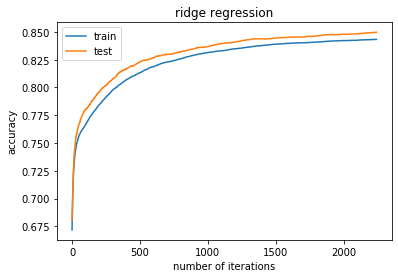

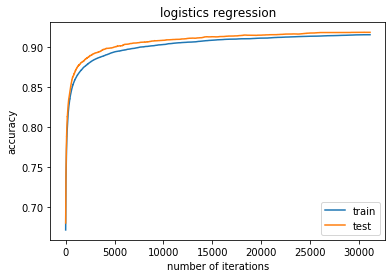

In [130]:
xs = range(len(mis_class_rate_train_l1))
plt.plot(xs, class_rate_train_l1, label = "train")
plt.plot(xs, class_rate_test_l1, label= "test")
plt.legend()
plt.xlabel("number of iterations")
plt.ylabel("accuracy")
plt.title("ridge regression")
plt.savefig("B4c1")
plt.show()


xs = range(len(mis_class_rate_train_l2))
plt.plot(xs, class_rate_train_l2, label = "train")
plt.plot(xs, class_rate_test_l2, label= "test")
plt.xlabel("number of iterations")
plt.ylabel("accuracy")
plt.legend()
plt.title("logistics regression")
plt.savefig("B4c2")
plt.show()
